# Program to create a multiclass model to classify CTG features into three fetal health states(Normal, Suspect and Pathological)

# Important Libraries to load

### There are several python modules required for this project.<br> The below modules are imported because of the functionality they provide.

In [1]:
import warnings
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#### Silence nuisance warnings and  make random numbers predictable

In [2]:
warnings.filterwarnings("ignore")
np.random.seed(0)

# Feeding the Code with Data

### Read the data into pandas and confirm the whole data has been read into <br>a dataframe which we have called whole_df

In [3]:
whole_df = pd.read_csv(r"fetal_health.csv")
whole_df.head().T

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


# Exploratory Data Analysis [EDA]

### Confirm all data have been captured by pandas by checking that dataframe truly has 2126 rolls and 22 columns,<br> checking for datatypes and for any Null/NaN value 

In [4]:
whole_df.shape

(2126, 22)

In [5]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### Generate a matrix of Correlation Coefficients.<br>This numbers are relationship indicators among data features and also the ground truth (label)

<AxesSubplot:>

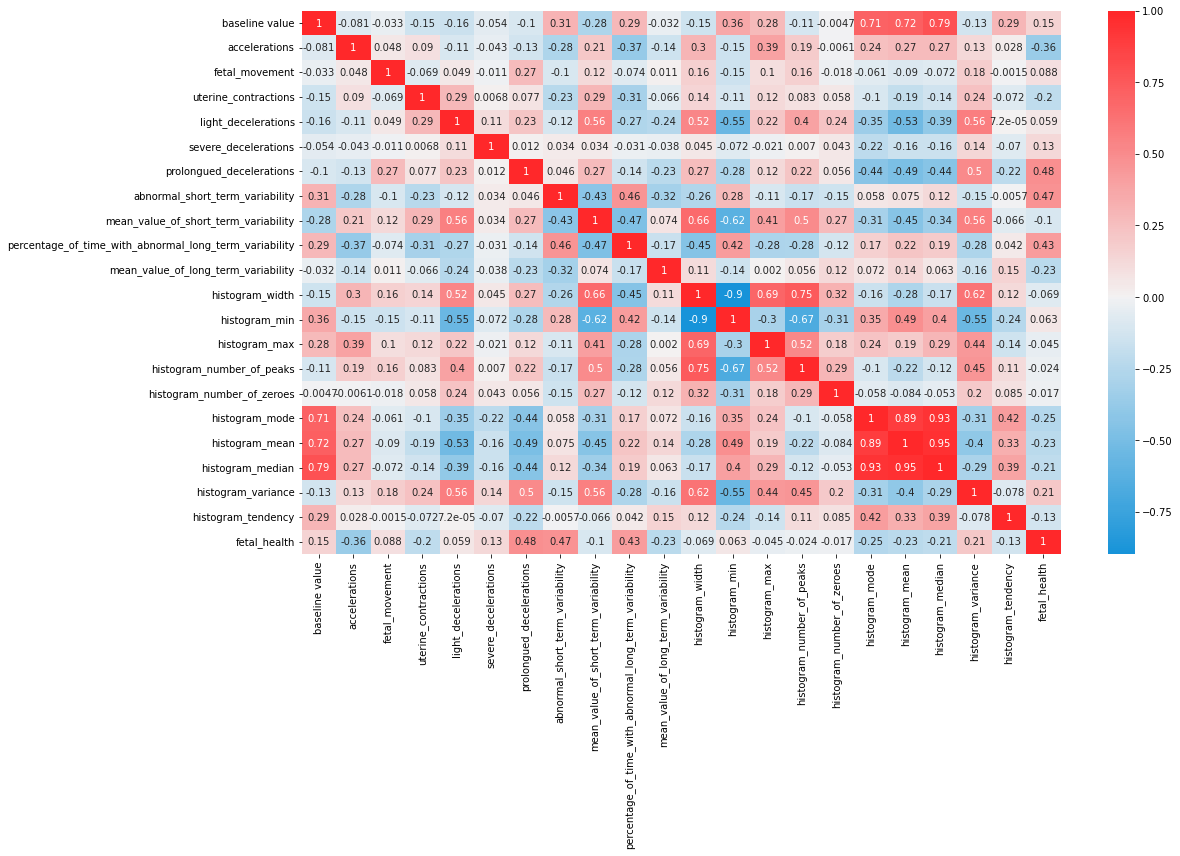

In [6]:
sns.reset_orig()
corr_mX = whole_df.corr()
corr_layout = sns.diverging_palette(245, 12, s=100, l=55, n=10, as_cmap=True)
plt.figure(figsize=(17,10))
sns.heatmap(corr_mX, annot=True, cmap=corr_layout, center=0)

### Extract the ground truth column of interest from the correlation matrix and<br> sort the correlation coefficients so as to trim out least significant parameters 

In [7]:
fetalhealth_correlations = corr_mX.iloc[-1:].T
fetalhealth_correlations.sort_values(by=['fetal_health'])

,fetal_health
accelerations,-0.364066
histogram_mode,-0.250412
histogram_mean,-0.226985
mean_value_of_long_term_variability,-0.226797
histogram_median,-0.205033
uterine_contractions,-0.204894
histogram_tendency,-0.131976
mean_value_of_short_term_variability,-0.103382
histogram_width,-0.068789
histogram_max,-0.045265


### From the correlation coefficients above, It is reasonable to say that correlation coefficients<br> between -0.075 and +0.075 (using 3 decimal places) indicates very weak or no linear correlation <br> with the ground truth FETAL_HEALTH and as such can be prune out.

### At this juncture, "insignificant parameters" are prune.

In [8]:
d_frm = whole_df.drop(['light_decelerations', 'histogram_width', 'histogram_min', 
                       'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes'], axis=1)
d_frm.head(6).T

,0,1,2,3,4,5
baseline value,120.0,132.000,133.000,134.000,132.000,134.000
accelerations,0.0,0.006,0.003,0.003,0.007,0.001
fetal_movement,0.0,0.000,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008,0.010
severe_decelerations,0.0,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000,0.002
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000,26.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400,5.900
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000,0.000
mean_value_of_long_term_variability,2.4,10.400,13.400,23.000,19.900,0.000


### Graphically examine the ground true for data balance

#### From the correlation matrix, we can see that relative to the ground truth :-<br><br>Two most +ve co-coeffs are prolongued_decelerations{0.484859} and abnormal_short_term_variability{0.471191)<br><br>Two most -ve co-coeffs are accelerations{-0.364066} and histogram_mode{-0.250412}

## We graphically illustrate this relationships on the backdrop of fetal_health

#### Cat plot showing fetal_movement, prolongued_decelerations and fetal_health

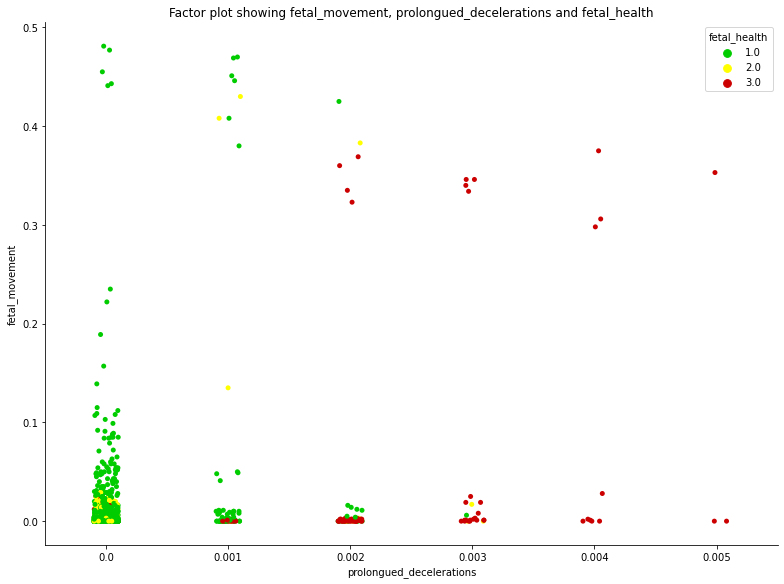

In [9]:
colours=[(0,0.8,0,1),(1,1,0,1), (0.8,0,0,1)]
sns.reset_orig()
sns.catplot(data = d_frm, x="prolongued_decelerations",y="fetal_movement",
               palette=colours, hue="fetal_health", height=8, aspect=11/8, legend_out=False)

plt.title("Factor plot showing fetal_movement, prolongued_decelerations and fetal_health", fontsize=12)
plt.show()

#### Cat plot showing fetal_movement, abnormal_short_term_variability and fetal_health

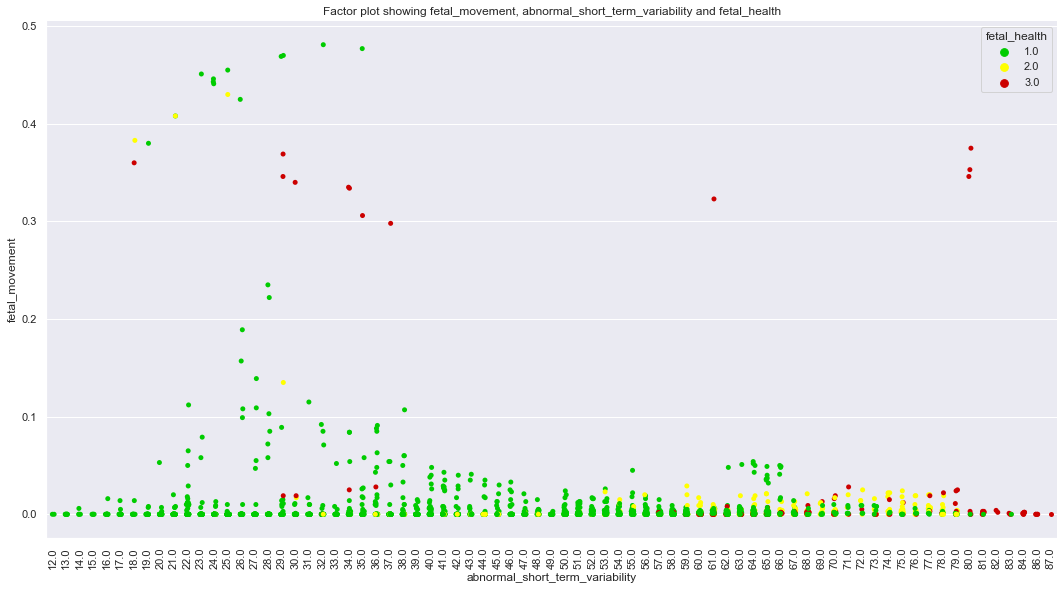

In [10]:
sns.reset_orig()
sns.set(rc={'figure.figsize':(400,400)})
sns.catplot(data = d_frm, x="abnormal_short_term_variability",y="fetal_movement",
               palette=colours, hue="fetal_health", height=8, aspect=15/8, legend_out=False)

plt.title("Factor plot showing fetal_movement, abnormal_short_term_variability and fetal_health", fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### Cat plot showing fetal_movement, abnormal_short_term_variability and fetal_health

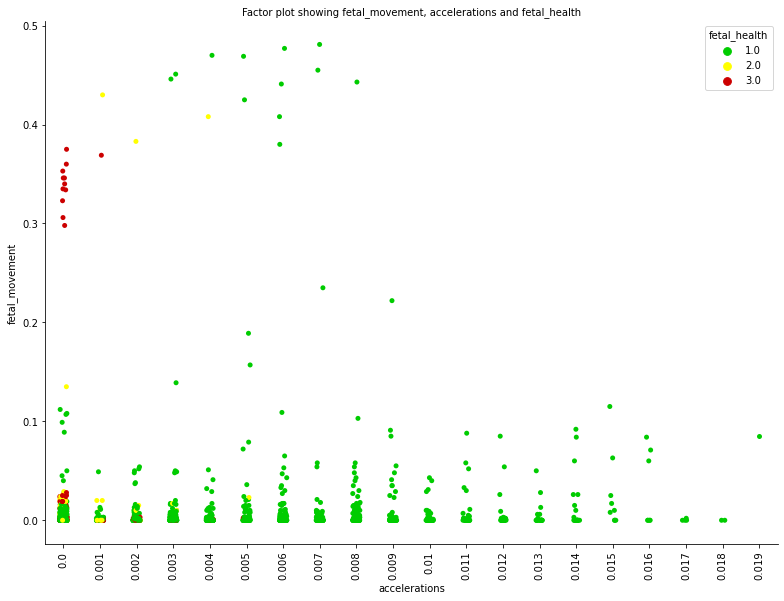

In [11]:
sns.reset_orig()
sns.catplot(data = d_frm, x="accelerations",y="fetal_movement",
               palette=colours, hue="fetal_health", height=8, aspect=11/8, legend_out=False)

plt.title("Factor plot showing fetal_movement, accelerations and fetal_health", fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### Cat plot showing fetal_movement, abnormal_short_term_variability and fetal_health

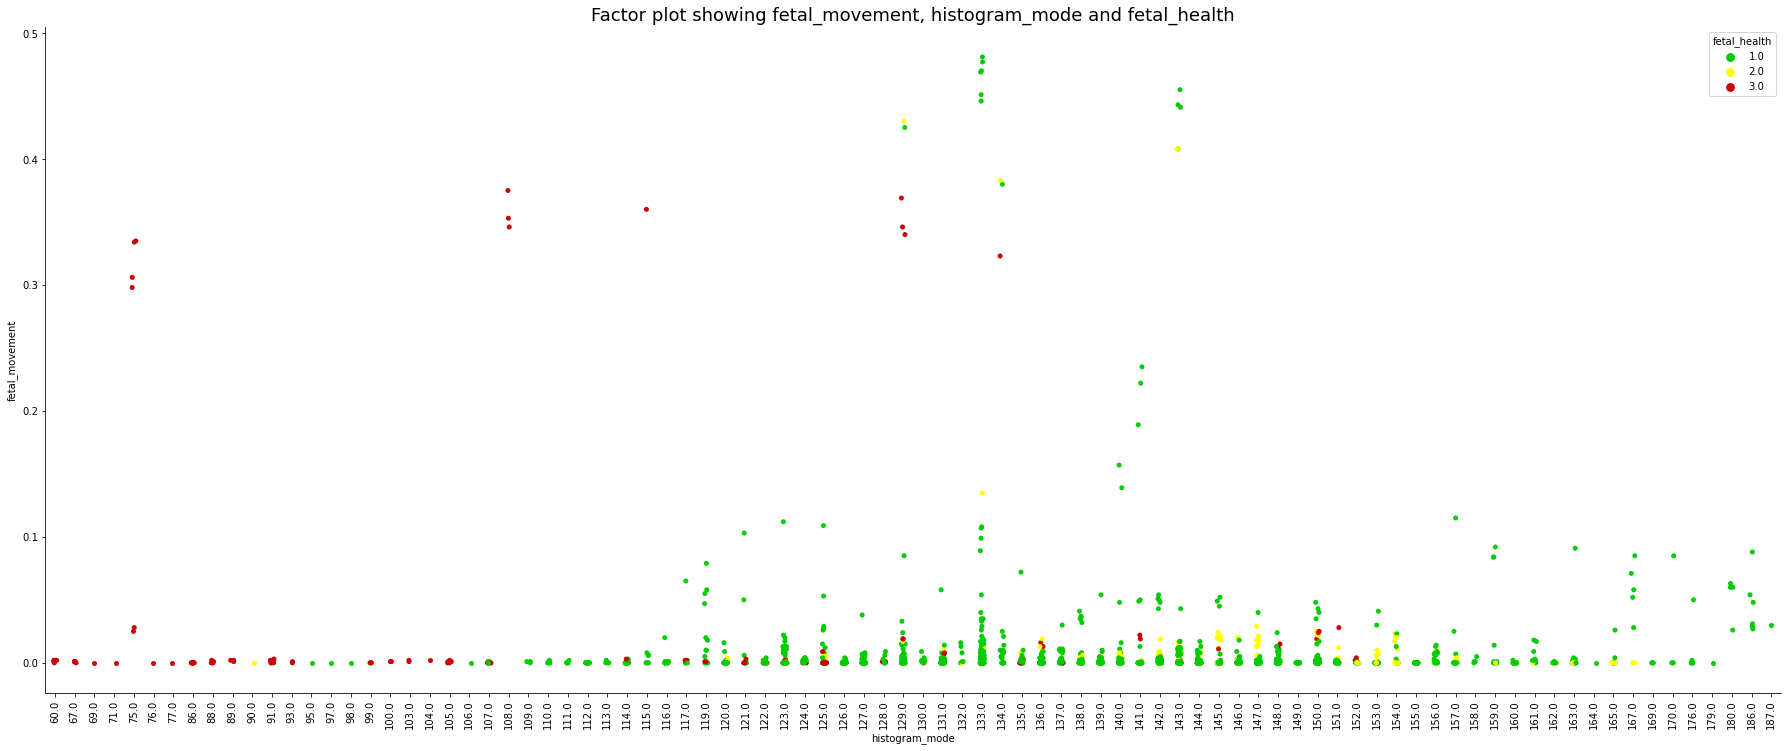

In [12]:
sns.reset_orig()
sns.catplot(data = d_frm, x="histogram_mode",y="fetal_movement",
               palette=colours, hue="fetal_health", height=10, aspect=25/10, legend_out=False)

plt.title("Factor plot showing fetal_movement, histogram_mode and fetal_health", fontsize=18)
plt.xticks(rotation=90)
plt.show()

#### Point plot for each parameter as against fetal_health

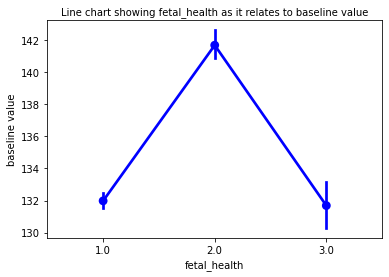

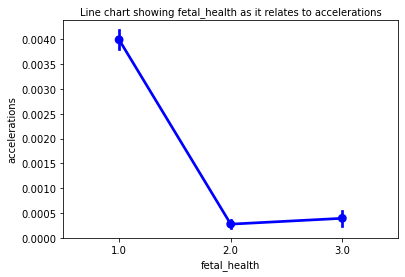

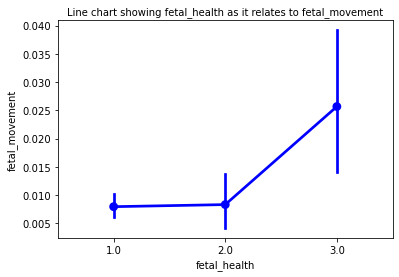

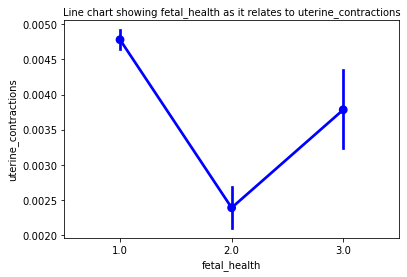

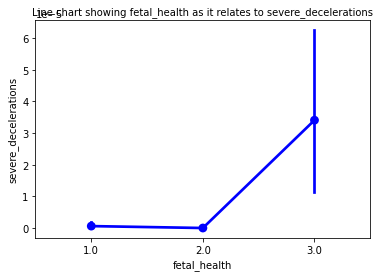

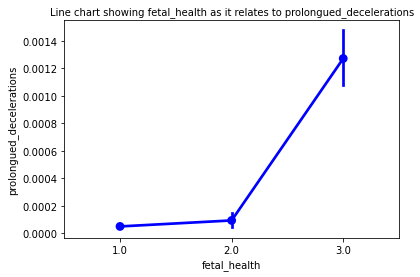

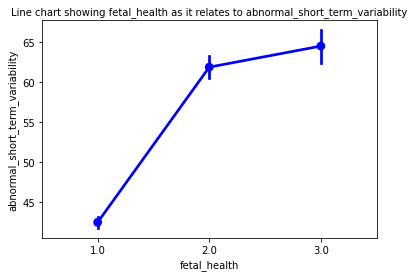

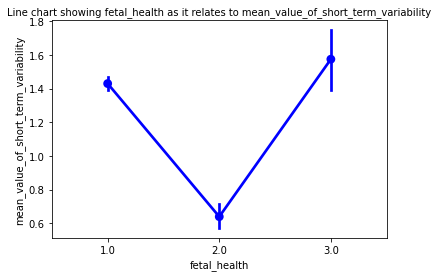

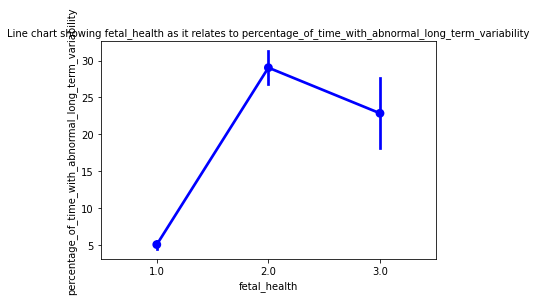

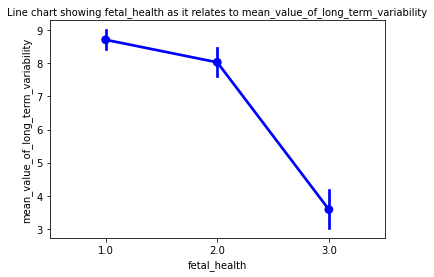

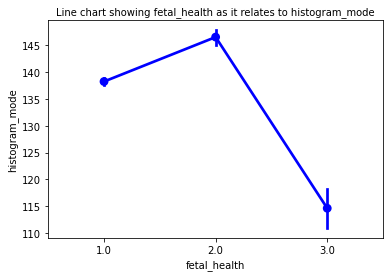

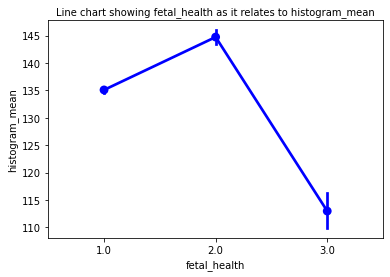

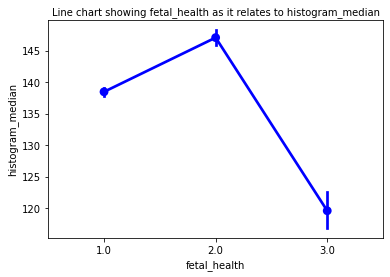

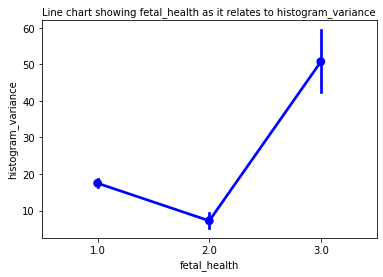

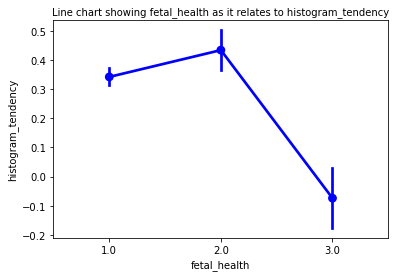

In [13]:
sns.reset_orig()
for cols in d_frm.head():     
    if cols == "fetal_health": break
    plt.title("Line chart showing fetal_health as it relates to " + cols, fontsize=10)    
    sns.pointplot(x =d_frm["fetal_health"], y =d_frm[cols] , color="blue", height=8, aspect=11/8, legend_out=False)    
    plt.show()
    


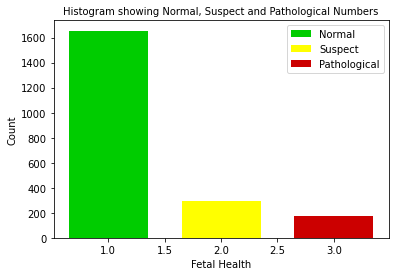

In [14]:
norm = plt.hist(d_frm[d_frm["fetal_health"] == 1.0].fetal_health, bins=1, fc = (0,0.8,0,1),label = "Normal", rwidth=0.7)
susp = plt.hist(d_frm[d_frm["fetal_health"] == 2.0].fetal_health, bins=1, fc = (1,1,0,1),label = "Suspect", rwidth=0.7)
path = plt.hist(d_frm[d_frm["fetal_health"] == 3.0].fetal_health, bins=1, fc = (0.8,0,0,1),label = "Pathological", rwidth=0.7)
plt.legend()

plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.title("Histogram showing Normal, Suspect and Pathological Numbers", fontsize=10)
plt.show()

### The chart shows a gross data imbalance in favour of Normal(1.0).<br>The values are Ordinal Categorical Values and as such nothing to worry about<br> since Recall, Precision, F1 Score will also be investigated

# Building and Training the Models

#### Algorithms requires we divide the data into <br>parameters (independent variables) and label(dependent variable)

In [15]:
parameters_X = d_frm.drop(["fetal_health"],axis=1)
label_y = d_frm["fetal_health"]

#### Place all parameters on same scale to see how they look graphically side by side

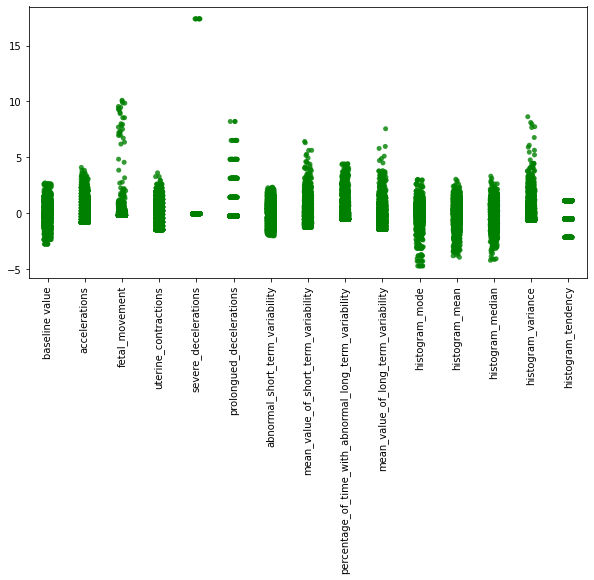

In [16]:
sns.reset_orig()
plt.figure(figsize=(10,5))
dataf_X = skl.preprocessing.StandardScaler().fit_transform(parameters_X)
dataf_X = pd.DataFrame(dataf_X, columns = list(parameters_X.columns))
sns.stripplot (data = dataf_X, color="green", alpha=0.8 )
plt.xticks(rotation=90)
plt.show()

#### Split the dataset in training(70%), validation(15%) and testing(15%)<br><br>First, data is divided into training and remnant.<br>The remnant set is then divided equally into validation and testing set

In [17]:
X_train, X_remnant, y_train, y_remnant = skl.model_selection.train_test_split(dataf_X, 
                                                                              label_y, train_size=0.7, random_state=42)

In [18]:
X_validate, X_test, y_validate, y_test = skl.model_selection.train_test_split(X_remnant,
                                                                              y_remnant, train_size=0.5, random_state=42)

#### Verify data split into Training, validation and Testing

In [19]:
print("Training Dataset   X : Y = ", X_train.shape, ": ", y_train.shape)
print("Validation Dataset X : Y = ", X_validate.shape, " : ", y_validate.shape)
print("Testing Dataset    X : Y = ", X_test.shape, " : ", y_test.shape)

Training Dataset   X : Y =  (1488, 15) :  (1488,)
Validation Dataset X : Y =  (319, 15)  :  (319,)
Testing Dataset    X : Y =  (319, 15)  :  (319,)


#### Create 5 models to see how they perform on our data. The algorithms are :-<br><br>Random Decision Forest<br>Support Vector Classifier<br>Decision Tree<br>Ridge Classifier<br>K-Nearest Neighbour

In [20]:
ran_fore_pipe =skl.pipeline.Pipeline([('ran_fore', skl.ensemble.RandomForestClassifier())])
sup_vect_pipe =skl.pipeline.Pipeline([('sup_vect', skl.svm.SVC())])
dec_tree_pipe =skl.pipeline.Pipeline([('dec_tree', skl.tree.DecisionTreeClassifier(random_state=42))])
rid_geCl_pipe =skl.pipeline.Pipeline([('rid_geCl', skl.linear_model.RidgeClassifier(random_state=42))])
k_near_n_pipe =skl.pipeline.Pipeline([('k_near-n', skl.neighbors.KNeighborsClassifier(n_neighbors=5))])

#The  models are placed in a pipeline and fitted
p_lines = [sup_vect_pipe, ran_fore_pipe, rid_geCl_pipe, dec_tree_pipe, k_near_n_pipe]

for p in p_lines:
    p.fit(X_train, y_train)

# Reference for printout
p_dict = {0: "Support Vector Classifier", 1: "Random Decision Forest", 
          2: "Ridge Classifier", 3: "Decision Tree", 4: "K Nearest Neighbour"}                                 

#### Accuracy: cross validation 

In [21]:
crossV_accuracy = []
for k, predictor in enumerate(p_lines):
    crossV_fig = skl.model_selection.cross_val_score(predictor, X_train, y_train, cv=10 )
    crossV_accuracy.append(crossV_fig)
    print("%26s: %f " % (p_dict[k], crossV_fig.mean()))      

 Support Vector Classifier: 0.902558 
    Random Decision Forest: 0.938867 
          Ridge Classifier: 0.860226 
             Decision Tree: 0.914656 
       K Nearest Neighbour: 0.899900 


#### All models performed excellently with around 90% on cross validation accuracy.<br>Random forest however has a bit of an edge with 94%.<br>With the models built, lets see what result we get on each model, using our 15% validation data we had earlier set aside 

In [22]:
k = 0
for p in p_lines:
    print("%s: " % (p_dict[k]))
    print(skl.metrics.classification_report(y_validate, p.predict(X_validate)))
    k += 1         

Support Vector Classifier: 
              precision    recall  f1-score   support

         1.0       0.95      0.94      0.95       252
         2.0       0.69      0.73      0.71        45
         3.0       0.86      0.82      0.84        22

    accuracy                           0.91       319
   macro avg       0.83      0.83      0.83       319
weighted avg       0.91      0.91      0.91       319

Random Decision Forest: 
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.97       252
         2.0       0.88      0.80      0.84        45
         3.0       0.91      0.95      0.93        22

    accuracy                           0.95       319
   macro avg       0.92      0.91      0.91       319
weighted avg       0.95      0.95      0.95       319

Ridge Classifier: 
              precision    recall  f1-score   support

         1.0       0.90      0.98      0.94       252
         2.0       0.74      0.44      0.56        45
   

#### A narrow down view will look like this 

In [23]:
k = 0
for p in p_lines:
    model_accuracy = skl.metrics.accuracy_score(y_validate, p.predict(X_validate))    
    prec = skl.metrics.precision_score(y_validate, p.predict(X_validate), average="weighted")
    rec  = skl.metrics.recall_score(y_validate, p.predict(X_validate), average="weighted")
    f1_s = skl.metrics.f1_score(y_validate, p.predict(X_validate), average="micro")
    print("%26s {" % (p_dict[k]), "%s: %f " % ("F1 Score", f1_s), "%s: %f " % ("| Precision", prec),
          "%s: %f " % ("| Recall", rec), "%s: %f " % ("| Accuracy", model_accuracy), "} ")   
    k += 1

 Support Vector Classifier { F1 Score: 0.905956  | Precision: 0.908146  | Recall: 0.905956  | Accuracy: 0.905956  } 
    Random Decision Forest { F1 Score: 0.946708  | Precision: 0.945821  | Recall: 0.946708  | Accuracy: 0.946708  } 
          Ridge Classifier { F1 Score: 0.884013  | Precision: 0.874123  | Recall: 0.884013  | Accuracy: 0.884013  } 
             Decision Tree { F1 Score: 0.927900  | Precision: 0.930069  | Recall: 0.927900  | Accuracy: 0.927900  } 
       K Nearest Neighbour { F1 Score: 0.899687  | Precision: 0.901719  | Recall: 0.899687  | Accuracy: 0.899687  } 


#### *Again, all models performed excellently. However, Random Forest outshine all the others on all metrics.*<br>

#### Ensemble Modeling performance

In [24]:
k = 0
g = list(y_test)
pred_col = np.full(shape = (X_test.shape[0],7), fill_value = 0, dtype = int)
for p in p_lines:
    y_hat = p.predict(X_test)
    for i in range(X_test.shape[0]):
        pred_col[i,k] = y_hat[i]  
    k += 1    
    
for j in range(X_test.shape[0]):
    ensemble = list(pred_col[j,:5])
    pred_col[j,5] = max(set(ensemble), key = ensemble.count)  
   
    pred_col[j,6] = g[j] 

pred_table = pd.DataFrame(pred_col, columns=["SVM", "Random Forest", "Ridge", "Decision Tree", 
                                              "K-NN", "Predicted: Fetal Health", "Label: Fetal Health"]) 
pred_table.reset_index(drop=True, inplace=True) 
pred_table.T

,0,1,2,3,4,5,6,7,8,9,...,309,310,311,312,313,314,315,316,317,318
SVM,2,1,1,2,1,1,1,2,1,2,...,1,1,3,2,2,2,1,1,1,2
Random Forest,1,1,1,2,1,1,1,2,1,2,...,1,1,3,1,2,2,1,1,1,2
Ridge,1,1,1,2,1,1,1,2,1,2,...,1,1,2,1,2,1,1,1,1,1
Decision Tree,1,1,1,2,1,3,1,2,1,2,...,1,1,3,1,2,2,1,1,1,1
K-NN,2,1,1,2,1,1,1,2,1,2,...,1,1,3,1,2,2,1,1,1,2
Predicted: Fetal Health,1,1,1,2,1,1,1,2,1,2,...,1,1,3,1,2,2,1,1,1,2
Label: Fetal Health,2,1,1,2,1,1,1,2,1,2,...,1,1,3,1,2,2,1,1,1,1


In [25]:
f1_s = skl.metrics.f1_score(y_test, pred_col[:,5], average="micro")
acc  = skl.metrics.accuracy_score(y_test, pred_col[:,5])
prec = skl.metrics.precision_score(y_test, pred_col[:,5], average="weighted")
rec  = skl.metrics.recall_score(y_test, pred_col[:,5], average="weighted")
print("Ensemble Model :")
print(" - F1 Score    : ", f1_s)
print(" - Recall      : ", rec)
print(" - Precision   : ", prec)
print(" - Accuracy    : ", acc)

Ensemble Model :
 - F1 Score    :  0.9278996865203762
 - Recall      :  0.9278996865203761
 - Precision   :  0.9266340984689619
 - Accuracy    :  0.9278996865203761


<AxesSubplot:>

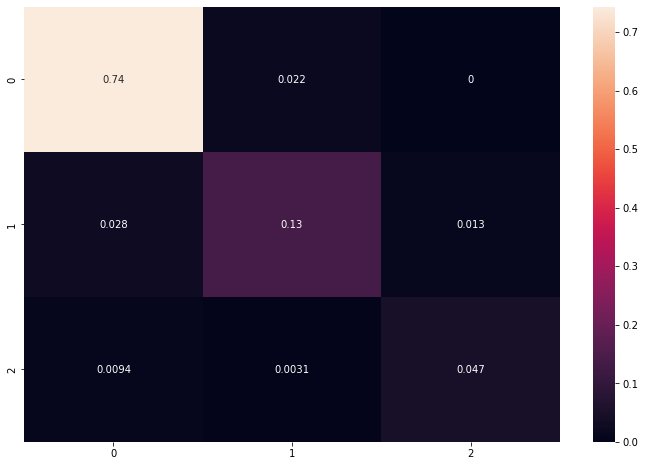

In [26]:
plt.subplots(figsize=(12,8))
conf_mat = confusion_matrix(y_test, y_hat)
sns.heatmap(conf_mat/np.sum(conf_mat), annot = True, annot_kws = {'size' : 10})

#### Again even with the models ensembled, metrics are still low compared to Random Forest alone

#### I am tempted to want to go with Random forest considering its performance metrics shown again below

In [28]:
pred_col = np.full(shape = (X_test.shape[0],2), fill_value = 0, dtype = int)

y_hat = ran_fore_pipe.predict(X_test)
for i in range(X_test.shape[0]):
    pred_col[i,0] = y_hat[i]  
    pred_col[i,1] = g[i] 

pred_table = pd.DataFrame(pred_col, columns=["Random Forest", "Label: Fetal Health"]) 
pred_table.reset_index(drop=True, inplace=True) 
pred_table.T

,0,1,2,3,4,5,6,7,8,9,...,309,310,311,312,313,314,315,316,317,318
Random Forest,1,1,1,2,1,1,1,2,1,2,...,1,1,3,1,2,2,1,1,1,2
Label: Fetal Health,2,1,1,2,1,1,1,2,1,2,...,1,1,3,1,2,2,1,1,1,1


In [29]:
f1_s = skl.metrics.f1_score(y_test, y_hat, average="micro")
acc  = skl.metrics.accuracy_score(y_test, y_hat)
prec = skl.metrics.precision_score(y_test, y_hat, average="weighted")
rec  = skl.metrics.recall_score(y_test, y_hat, average="weighted")
print("Random Forest :")
print(" - F1 Score    : ", f1_s)
print(" - Recall      : ", rec)
print(" - Precision   : ", prec)
print(" - Accuracy    : ", acc)

Random Forest :
 - F1 Score    :  0.9404388714733543
 - Recall      :  0.9404388714733543
 - Precision   :  0.9394874393293946
 - Accuracy    :  0.9404388714733543


<AxesSubplot:>

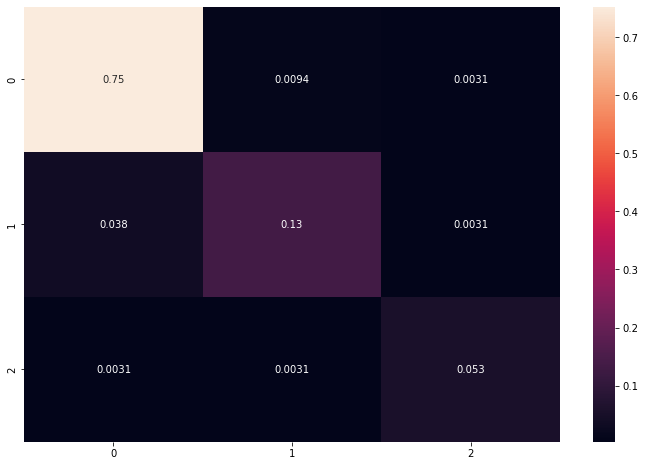

In [30]:
plt.subplots(figsize=(12,8))
conf_mat = confusion_matrix(y_test, y_hat)
sns.heatmap(conf_mat/np.sum(conf_mat), annot = True, annot_kws = {'size' : 10})

## However, I believe that a committee of very good models in the long run, will also be better than any one model particularly if the performance metrics is not significantly different.<br><br> I hereby settle for Ensemble learning Model